I am writing a classifier for Fashion MNIST dataset.

## Importing the libraries and data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Number of classes
np.max(train_labels)

9

In [4]:
np.shape(train_images)

(60000, 28, 28)

In [5]:
np.shape(train_labels)

(60000,)

### Let's take a look at the dataset
Below we see some images that are in this data set.

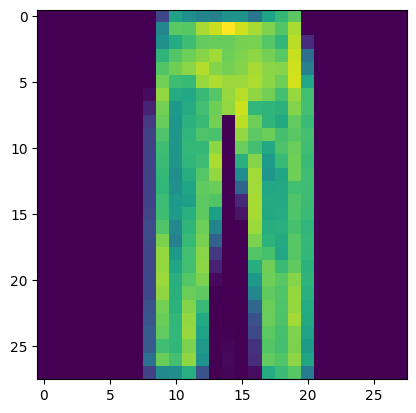

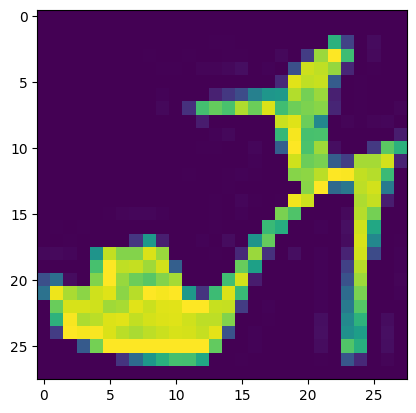

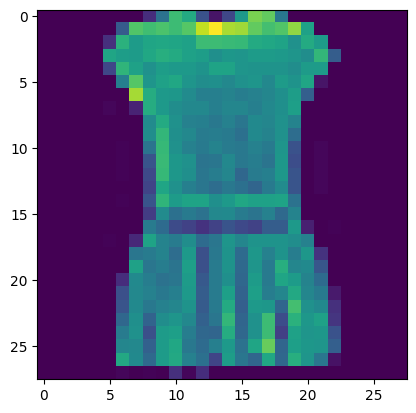

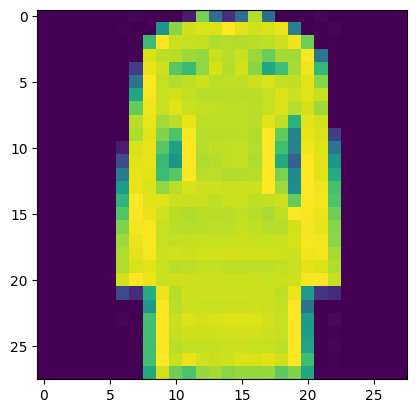

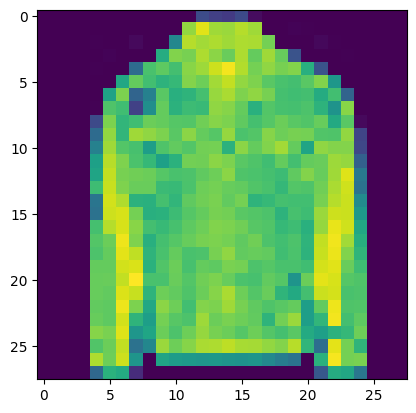

In [6]:
# Showing some images from the dataset
plt.figure()
plt.imshow(train_images[16])
plt.show()

plt.imshow(train_images[9])
plt.show()

plt.imshow(train_images[3])
plt.show()

plt.imshow(train_images[500])
plt.show()

plt.imshow(train_images[29])
plt.show()

In [7]:
test_labels = keras.utils.to_categorical(test_labels)
train_labels = keras.utils.to_categorical(train_labels)


In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# **Using Dense (fully connected) networks**

In [9]:
# Build the model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Flatten())
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 20)        40        
                                                                 
 dropout (Dropout)           (None, 28, 28, 20)        0         
                                                                 
 dense_1 (Dense)             (None, 28, 28, 20)        420       
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 20)        0         
                                                                 
 flatten (Flatten)           (None, 15680)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                156810    
                                                                 
Total params: 157,270
Trainable params: 157,270
Non-trai

In [11]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(train_images, train_labels,
          epochs=200,
          batch_size=256, validation_data=(test_images, test_labels))

Epoch 1/200
235/235 [==============================] - 11s 11ms/step - loss: 0.6155 - accuracy: 0.7865 - val_loss: 0.4715 - val_accuracy: 0.8354
Epoch 2/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4544 - accuracy: 0.8402 - val_loss: 0.4445 - val_accuracy: 0.8437
Epoch 3/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4290 - accuracy: 0.8481 - val_loss: 0.4238 - val_accuracy: 0.8510
Epoch 4/200
235/235 [==============================] - 2s 9ms/step - loss: 0.4105 - accuracy: 0.8538 - val_loss: 0.4142 - val_accuracy: 0.8520
Epoch 5/200
235/235 [==============================] - 2s 10ms/step - loss: 0.4032 - accuracy: 0.8561 - val_loss: 0.4009 - val_accuracy: 0.8562
Epoch 6/200
235/235 [==============================] - 4s 15ms/step - loss: 0.3968 - accuracy: 0.8573 - val_loss: 0.4024 - val_accuracy: 0.8557
Epoch 7/200
235/235 [==============================] - 2s 8ms/step - loss: 0.3913 - accuracy: 0.8597 - val_loss: 0.4203 - val_accuracy: 0.

In [13]:
# Test on unseen data
results = model.evaluate(test_images, test_labels)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8670
Final test set loss: 0.383466
Final test set accuracy: 0.867000


Test Accuracy: 0.8669999837875366 
Maximum Test Acuracy During Training:  0.8711000084877014


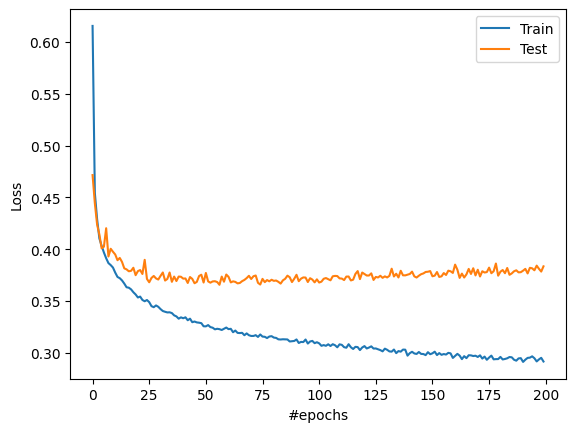

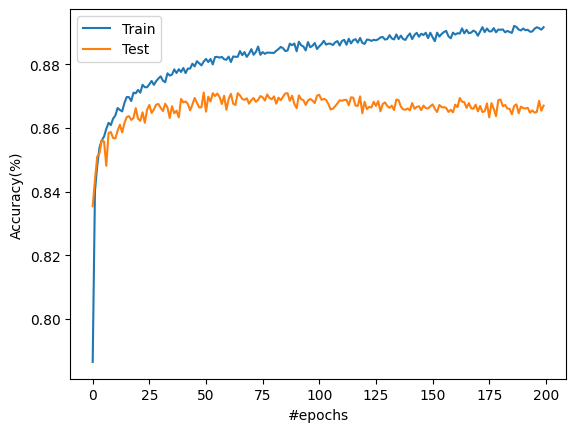

In [14]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

# **Using Convolutional classification**

In [11]:
# Build the model
model = Sequential()
model.add(layers.Conv2D(20, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        11584     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_average_pooling2d (G  (None, 64)               0

In [13]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Fit the model on training data
history = model.fit(train_images, train_labels,
          epochs=200, batch_size=256, validation_split=0.2)

Epoch 1/200
188/188 [==============================] - 12s 10ms/step - loss: 1.2809 - accuracy: 0.5291 - val_loss: 0.7266 - val_accuracy: 0.7363
Epoch 2/200
188/188 [==============================] - 1s 7ms/step - loss: 0.7808 - accuracy: 0.7086 - val_loss: 0.6140 - val_accuracy: 0.7588
Epoch 3/200
188/188 [==============================] - 1s 7ms/step - loss: 0.6797 - accuracy: 0.7431 - val_loss: 0.5558 - val_accuracy: 0.7793
Epoch 4/200
188/188 [==============================] - 1s 8ms/step - loss: 0.6324 - accuracy: 0.7615 - val_loss: 0.5181 - val_accuracy: 0.7938
Epoch 5/200
188/188 [==============================] - 2s 8ms/step - loss: 0.5883 - accuracy: 0.7778 - val_loss: 0.4890 - val_accuracy: 0.8105
Epoch 6/200
188/188 [==============================] - 1s 7ms/step - loss: 0.5534 - accuracy: 0.7938 - val_loss: 0.4692 - val_accuracy: 0.8227
Epoch 7/200
188/188 [==============================] - 1s 7ms/step - loss: 0.5272 - accuracy: 0.8052 - val_loss: 0.4429 - val_accuracy: 0.83

In [13]:
# Test on unseen data
results = model.evaluate(test_images, test_labels)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6898 - accuracy: 0.9044
Final test set loss: 0.689769
Final test set accuracy: 0.904400


Test Accuracy: 0.9068333506584167 
Maximum Test Acuracy During Training:  0.9161666631698608


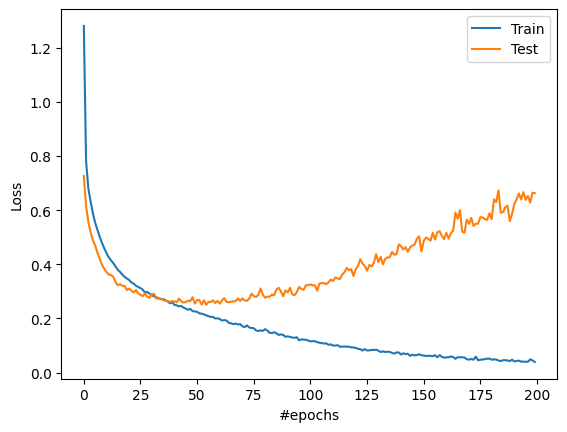

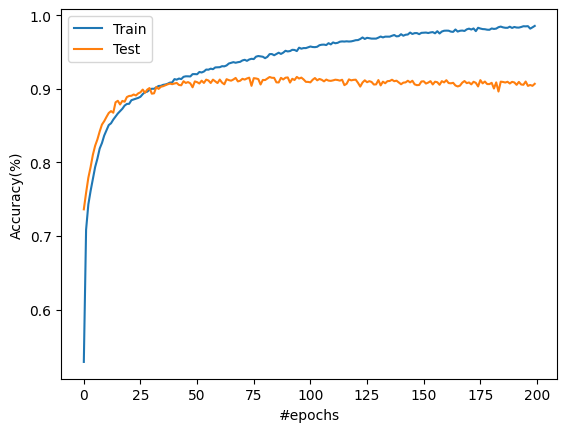

In [14]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

## **Early Stopping to avoid overfitting in neural network**

As is seen in the above plot, our data is overfitted, so I will use Early Stopping callback to avoid overfitting in my neural network.

In [9]:
# Build the model
model = Sequential()
model.add(layers.Conv2D(20, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        11584     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_average_pooling2d (G  (None, 64)               0

In [11]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
EarlyStopping = EarlyStopping(monitor='val_loss', patience=2)
ModelCheckpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [13]:
# Fit the model on training data
history = model.fit(train_images, train_labels,
          epochs=200, batch_size=256, validation_split=0.2, callbacks = [EarlyStopping, ModelCheckpoint])

Epoch 1/200
188/188 [==============================] - 14s 11ms/step - loss: 1.3111 - accuracy: 0.5228 - val_loss: 0.7345 - val_accuracy: 0.7342
Epoch 2/200
188/188 [==============================] - 2s 8ms/step - loss: 0.7828 - accuracy: 0.7148 - val_loss: 0.6083 - val_accuracy: 0.7735
Epoch 3/200
188/188 [==============================] - 2s 9ms/step - loss: 0.6800 - accuracy: 0.7505 - val_loss: 0.5523 - val_accuracy: 0.7835
Epoch 4/200
188/188 [==============================] - 1s 7ms/step - loss: 0.6196 - accuracy: 0.7726 - val_loss: 0.5080 - val_accuracy: 0.8065
Epoch 5/200
188/188 [==============================] - 1s 7ms/step - loss: 0.5768 - accuracy: 0.7920 - val_loss: 0.4680 - val_accuracy: 0.8292
Epoch 6/200
188/188 [==============================] - 1s 7ms/step - loss: 0.5444 - accuracy: 0.8055 - val_loss: 0.4532 - val_accuracy: 0.8322
Epoch 7/200
188/188 [==============================] - 1s 7ms/step - loss: 0.5188 - accuracy: 0.8142 - val_loss: 0.4286 - val_accuracy: 0.84

In [14]:
# Test on unseen data
results = model.evaluate(test_images, test_labels)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.8988
Final test set loss: 0.286987
Final test set accuracy: 0.898800


Test Accuracy: 0.9028333425521851 
Maximum Test Acuracy During Training:  0.903083324432373


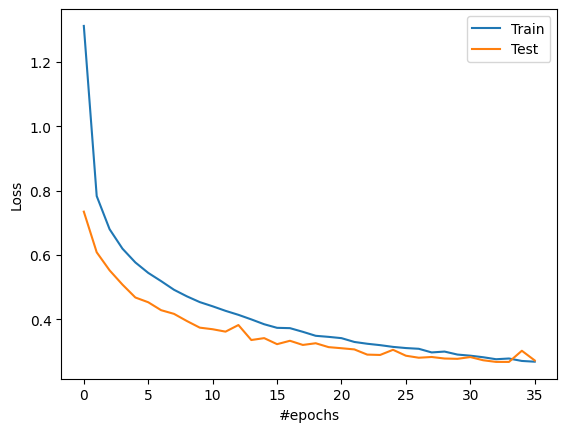

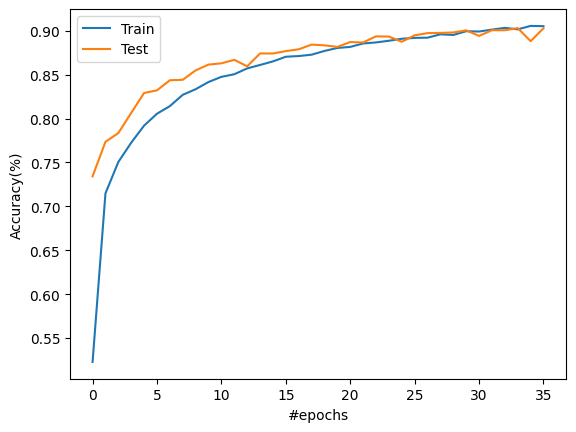

In [15]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

Now, as is seen above, the overfitting problem has been solved and the best model is saved; the saved model can then be loaded and evaluated at any time by calling the load_model() function:

In [ ]:
saved_model = load_model('best_model.h5')
train_acc = saved_model.evaluate(train_images, train_labels, verbose=0)
test_acc = saved_model.evaluate(test_images, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))